In [2]:
import re
def strip_all_but_numbers(stub):
    return float(re.sub('\D', '', stub))

In [7]:
import os

directory = "./output"
print(type(directory))
target_string="ENERGY| Total FORCE_EVAL ( QS ) energy (a.u.):"
mapping={}

for file in os.listdir(directory):
    filename = os.fsdecode(directory+"/"+file)
    if filename.endswith(".out"): 
        with open(filename,'r') as f:
            for line in f:
                if target_string in line:
                    mapping[strip_all_but_numbers(filename)]=float(line.replace(target_string,''))
                    break
        continue
    else:
        continue

<class 'str'>


<module 'matplotlib.pyplot' from '/home/mayank/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

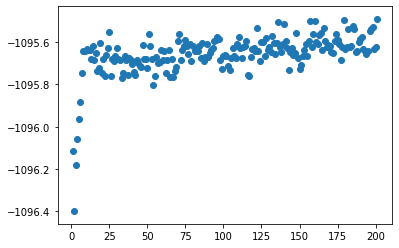

In [8]:
import matplotlib.pyplot as plt
plt.scatter(*zip(*mapping.items()))
plt

In [9]:
import collections
od = collections.OrderedDict(sorted(mapping.items()))

<module 'matplotlib.pyplot' from '/home/mayank/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

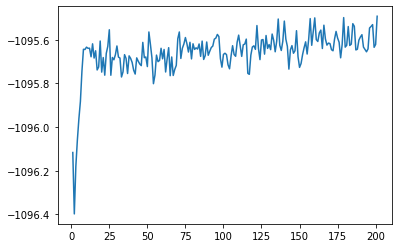

In [10]:
plt.plot(*zip(*od.items()))
plt